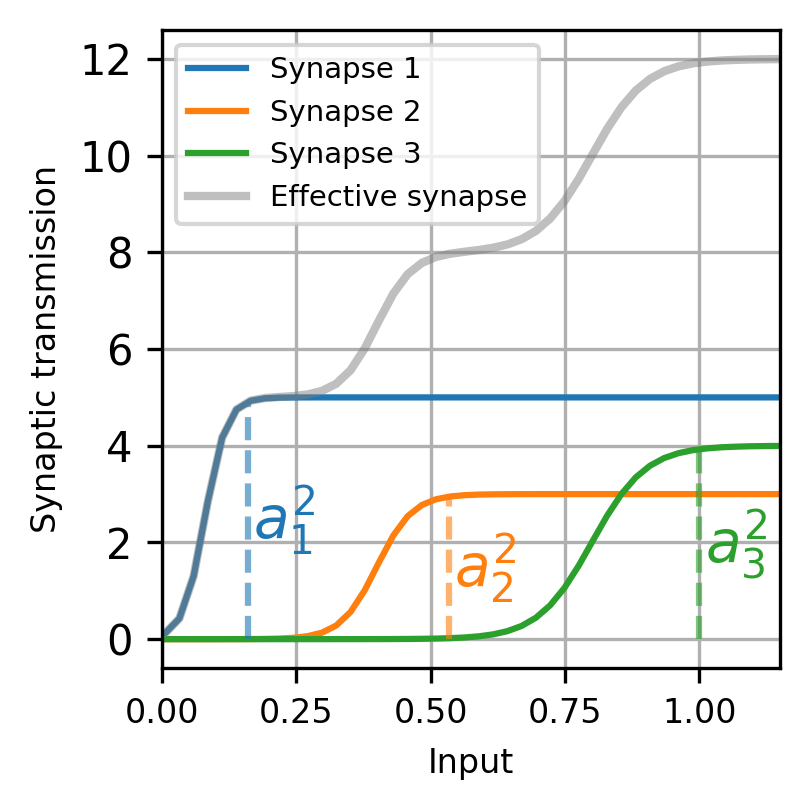

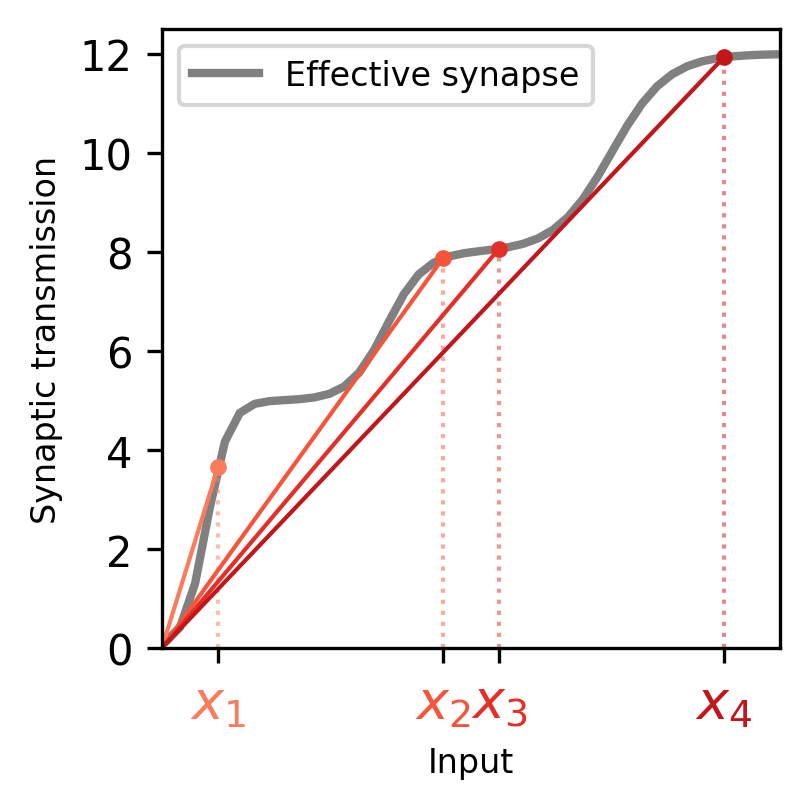

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']


thres = [0.08, 0.4, 0.8]
ampli = [5, 3, 4]
slope = [50, 30, 20]
x = np.linspace(-0.1, 1.2, 50)
y = np.zeros((50,))


plt.figure(figsize=(2.8, 2.8),dpi=300)
for i in range(3):
    
    y_ =  ampli[i] * 1/(1 + np.exp(-slope[i]*(x-thres[i])))
    y += y_ 
        

    plt.plot(x, y_, color=colors[i], linewidth=1.5,  label = 'Synapse '+str(i+1))
    plt.xlabel('Input', fontsize = 8)
    plt.ylabel('Synaptic transmission', fontsize = 8)
    # plt.xticks([0,0.25,0.5 ,0.75, 1]  , fontsize = 8)
    # plt.yticks([0, 1, 2, 3, 4, 5, 6], fontsize = 8)
    
    plt.xlim([0, 1.15])
    # plt.ylim([0, 6])
# Add vertical lines at 2*thres locations with amplitude labels
for i in range(3):
    x_pos = thres[i] + 4./slope[i]
    if x_pos <= plt.xlim()[1]:  # Only plot if within x-axis limits
        y_val = ampli[i] * 1/(1 + np.exp(-slope[i]*(x_pos-thres[i])))
        plt.plot([x_pos, x_pos], [0, y_val], '--', color=colors[i], alpha=0.6)
        plt.text(x_pos+0.01, y_val/2, f'$a_{{{i+1}}}^2$', 
                color=colors[i], fontsize=14, verticalalignment='center')

plt.xticks([0, 0.25, 0.5, 0.75, 1], fontsize=8)
    
plt.plot(x, y, color='grey',alpha=0.5, linewidth=2, label = 'Effective synapse')
plt.grid()

plt.legend(fontsize = 7, loc = 'upper left')
plt.tight_layout()
plt.savefig('effective_synapse_amplitude.pdf')

y = np.zeros((50,)) 
for i in range(3):
    
    y_ =  ampli[i] * 1/(1 + np.exp(-slope[i]*(x-thres[i])))
    y += y_ 
    
# Generate random points along y curve
np.random.seed(42)  # For reproducibility 
# x_points = np.random.uniform(0.2, 0.9, n_lines)
x_points = np.array([0.1, 0.5, 0.6, 1])
n_lines = len(x_points)
y_points = np.zeros_like(x_points)

# Get y values at those x points
for i in range(n_lines):
    for j in range(3):
        y_points[i] += ampli[j] * 1/(1 + np.exp(-slope[j]*(x_points[i]-thres[j])))
        
# Plot lines from origin to points
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
colors = plt.cm.Reds(np.linspace(0, 1, 10))[4:9]

xticks = []
fig, ax = plt.subplots(figsize=(2.8, 2.8),dpi=300)
ax.plot(x, y, color='grey', linewidth=2, label = 'Effective synapse')

for i in range(n_lines):
    ax.plot([0, x_points[i]], [0, y_points[i]], '-',  color=colors[i], linewidth=1)
    ax.plot([x_points[i], x_points[i]], [0, y_points[i]], ':',alpha=0.5 , color=colors[i], linewidth=1)
    xticks.append(x_points[i])
    # Add small dot at intersection
    ax.plot(x_points[i], y_points[i], 'o', markersize=3, color=colors[i])

ax.set_xlim([0., 1.1])
ax.set_xticks(xticks, fontsize = 8, labels = [])
ax.set_xlabel('Input', fontsize = 8)
ax.set_ylabel('Synaptic transmission', fontsize = 8)
ax.legend(fontsize = 8, loc = 'upper left')

ax.set_xticks(xticks)
ax.set_xticklabels(['$x_1$', '$x_2$', '$x_3$', '$x_4$'], fontsize=13)
for i, tick in enumerate(ax.get_xticklabels()):
    tick.set_color(colors[i])
ax.set_ylim([0, 12.5])
plt.tight_layout()
plt.savefig('effective_synapse_weights.pdf')